In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 200

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')

stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [10]:
df = pd.read_csv('data/Seasons_stats_complete.csv')

In [11]:
drop_me = ['Unnamed: 0', 'Year', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%', 'ORB', 'DRB']

In [12]:
df_2011 = df[df['Year']==2011].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2012 = df[df['Year']==2012].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2013 = df[df['Year']==2013].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2014 = df[df['Year']==2014].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2015 = df[df['Year']==2015].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2016 = df[df['Year']==2016].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2017 = df[df['Year']==2017].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2018 = df[df['Year']==2018].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')
df_2019 = df[df['Year']==2019].drop(columns=drop_me).drop_duplicates('Player').reset_index().drop(columns='index')

In [13]:
WS_scores = df[df['Year']>2014]['WS']

Text(0, 0.5, 'Counts')

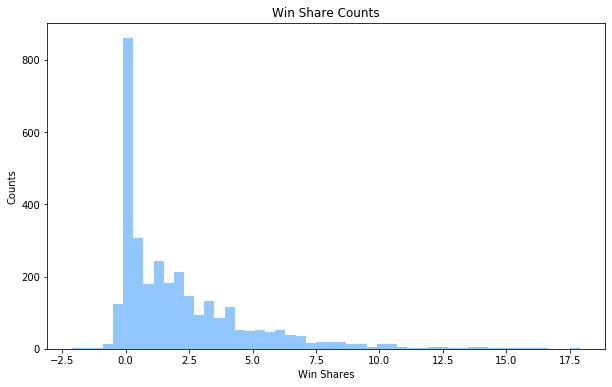

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('Win Share Counts')
ax.set_xlabel('Win Shares')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

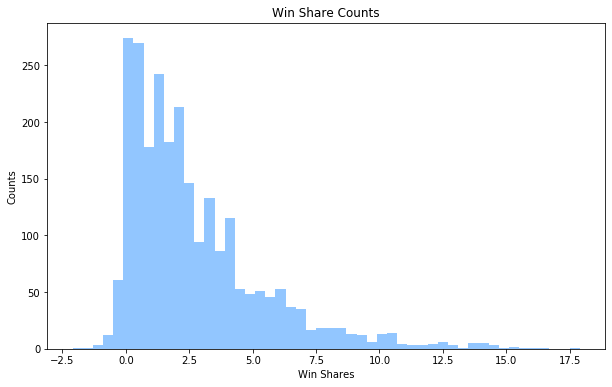

In [82]:
WS_scores = df[(df['Year']>2014) & (df['MP']>200)]['WS']
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('Win Share Counts')
ax.set_xlabel('Win Shares')
ax.set_ylabel('Counts')

In [94]:
x_for_plots = df_2019[df_2019['MP']>200].drop(columns=['Player'])
y_for_plots = df_2019[df_2019['MP']>200]['WS']
columns = x_for_plots.columns

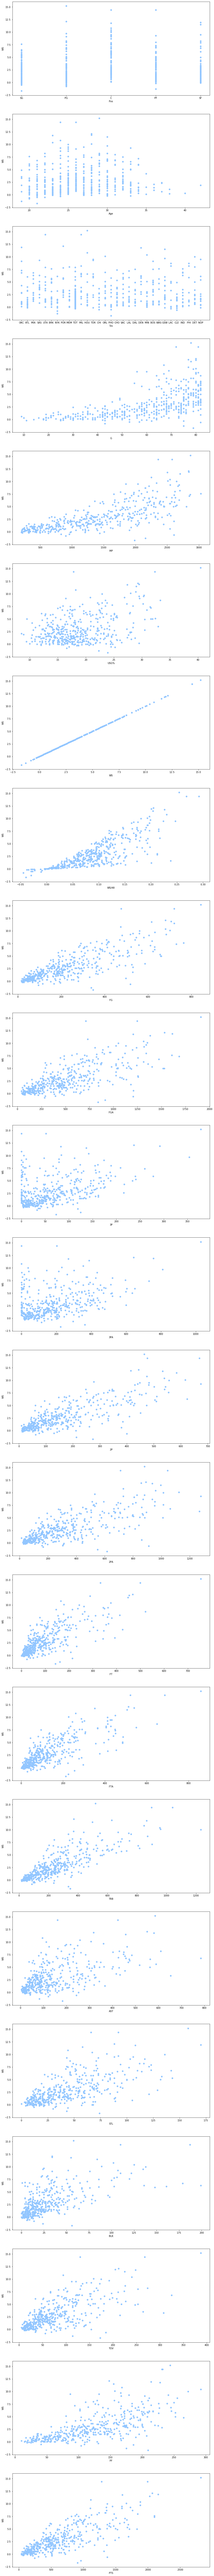

In [95]:
fig, ax = plt.subplots(len(columns),1, figsize=(15,200))
for i, col in enumerate(columns):
    ax[i].scatter(x_for_plots[col], y_for_plots)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('WS')

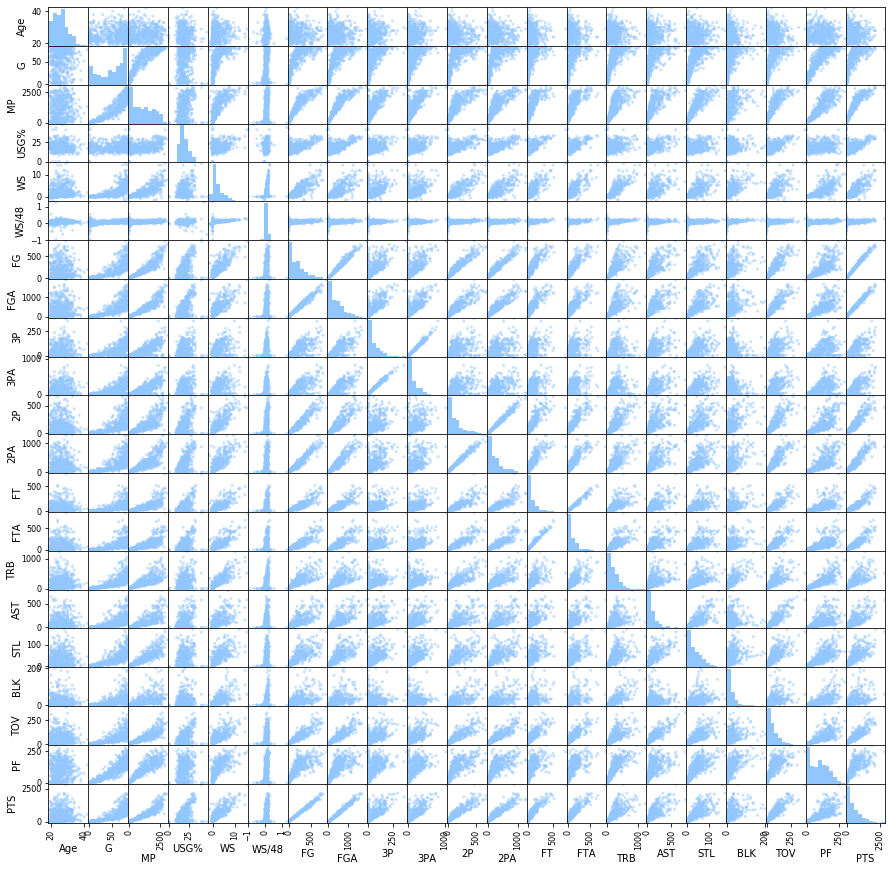

In [83]:
scatter_matrix(df_2019,figsize=(15,15))
plt.show()

In [19]:
merged = df_2015.set_index('Player')\
    .join(df_2016.set_index('Player'),lsuffix='_2015', rsuffix='_2016',how='outer')\
    .join(df_2017.set_index('Player'),lsuffix='_2016', rsuffix='_2017',how='outer')\
    .join(df_2018.set_index('Player'),lsuffix='_2017', rsuffix='_2018',how='outer').reset_index()

In [20]:
merged

,Player,Pos_2015,Age_2015,Tm_2015,G_2015,MP_2015,USG%_2015,WS_2015,WS/48_2015,FG_2015,FGA_2015,3P_2015,3PA_2015,2P_2015,2PA_2015,FT_2015,FTA_2015,TRB_2015,AST_2015,STL_2015,BLK_2015,TOV_2015,PF_2015,PTS_2015,Pos_2016,Age_2016,Tm_2016,G_2016,MP_2016,USG%_2016,WS_2016,WS/48_2016,FG_2016,FGA_2016,3P_2016,3PA_2016,2P_2016,2PA_2016,FT_2016,FTA_2016,TRB_2016,AST_2016,STL_2016,BLK_2016,TOV_2016,PF_2016,PTS_2016,Pos_2017,Age_2017,Tm_2017,G_2017,MP_2017,USG%_2017,WS_2017,WS/48_2017,FG_2017,FGA_2017,3P_2017,3PA_2017,2P_2017,2PA_2017,FT_2017,FTA_2017,TRB_2017,AST_2017,STL_2017,BLK_2017,TOV_2017,PF_2017,PTS_2017,Pos_2018,Age_2018,Tm_2018,G_2018,MP_2018,USG%_2018,WS_2018,WS/48_2018,FG_2018,FGA_2018,3P_2018,3PA_2018,2P_2018,2PA_2018,FT_2018,FTA_2018,TRB_2018,AST_2018,STL_2018,BLK_2018,TOV_2018,PF_2018,PTS_2018
0,A.J. Hammons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,24.0,DAL,22.0,163.0,17.6,0.0,-0.001,17.0,42.0,5.0,10.0,12.0,32.0,9.0,20.0,36.0,4.0,1.0,13.0,10.0,21.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A.J. Price,PG,28.0,TOT,26.0,324.0,22.5,0.3,0.041,51.0,137.0,15.0,57.0,36.0,80.0,16.0,24.0,32.0,46.0,7.0,0.0,14.0,15.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron Brooks,PG,30.0,CHI,82.0,1885.0,25.0,3.3,0.083,344.0,817.0,121.0,313.0,223.0,504.0,145.0,174.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0,PG,31.0,CHI,69.0,1108.0,22.9,0.9,0.040,188.0,469.0,66.0,185.0,122.0,284.0,49.0,64.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0,PG,32.0,IND,65.0,894.0,19.2,0.3,0.016,121.0,300.0,48.0,128.0,73.0,172.0,32.0,40.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0,PG,33.0,MIN,32.0,189.0,19.9,0.1,0.033,28.0,69.0,11.0,31.0,17.0,38.0,8.0,11.0,17.0,20.0,6.0,0.0,11.0,28.0,75.0
3,Aaron Gordon,PF,19.0,ORL,47.0,797.0,15.5,1.0,0.060,93.0,208.0,13.0,48.0,80.0,160.0,44.0,61.0,169.0,33.0,21.0,22.0,38.0,83.0,243.0,PF,20.0,ORL,78.0,1863.0,17.3,5.4,0.139,274.0,579.0,42.0,142.0,232.0,437.0,129.0,193.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,SF,21.0,ORL,80.0,2298.0,20.1,3.7,0.076,393.0,865.0,77.0,267.0,316.0,598.0,156.0,217.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0,PF,22.0,ORL,58.0,1909.0,24.7,2.9,0.072,375.0,865.0,115.0,342.0,260.0,523.0,157.0,225.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0
4,Aaron Harrison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,21.0,CHO,21.0,93.0,13.7,0.0,-0.014,5.0,19.0,3.0,10.0,2.0,9.0,5.0,12.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,SG,22.0,CHO,5.0,17.0,12.9,-0.1,-0.146,0.0,4.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0,SG,23.0,DAL,9.0,233.0,15.5,-0.1,-0.014,19.0,69.0,9.0,43.0,10.0,26.0,13.0,17.0,24.0,11.0,9.0,2.0,3.0,27.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,Zach LaVine,PG,19.0,MIN,77.0,1902.0,22.0,-0.7,-0.018,286.0,677.0,57.0,167.0,229.0,510.0,149.0,177.0,214.0,276.0,54.0,10.0,193.0,158.0,778.0,SG,20.0,MIN,82.0,2294.0,23.5,2.6,0.054,433.0,959.0,123.0,316.0,310.0,643.0,161.0,203.0,228.0,251.0,69.0,17.0,155.0,193.0,1150.0,SG,21.0,MIN,47.0,1749.0,21.7,3.0,0.082,326.0,710.0,120.0,310.0,206.0,400.0,117.0,140.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,SG,22.0,CHI,24.0,656.0,29.5,0.3,0.025,136.0,355.0,42.0,123.0,94.0,232.0,87.0,107.0,94.0,72.0,24.0,4.0,43.0,55.0,401.0
792,Zach Randolph,PF,33.0,MEM,71.0,2304.0,24.3,7.2,0.149,454.0,932.0,7.0,

In [21]:
merged_train = merged.dropna(subset=['TRB_2017', 'TRB_2018'])

In [24]:
merged_train = merged_train[merged_train['MP_2018']>200]

In [25]:
# merged_train = merged_train[merged_train['WS_2018']>2]

In [26]:
merged_train = merged_train.fillna(0)

In [27]:
columns = merged_train.columns

In [28]:
columns

Index(['Player', 'Pos_2015', 'Age_2015', 'Tm_2015', 'G_2015', 'MP_2015',
       'USG%_2015', 'WS_2015', 'WS/48_2015', 'FG_2015', 'FGA_2015', '3P_2015',
       '3PA_2015', '2P_2015', '2PA_2015', 'FT_2015', 'FTA_2015', 'TRB_2015',
       'AST_2015', 'STL_2015', 'BLK_2015', 'TOV_2015', 'PF_2015', 'PTS_2015',
       'Pos_2016', 'Age_2016', 'Tm_2016', 'G_2016', 'MP_2016', 'USG%_2016',
       'WS_2016', 'WS/48_2016', 'FG_2016', 'FGA_2016', '3P_2016', '3PA_2016',
       '2P_2016', '2PA_2016', 'FT_2016', 'FTA_2016', 'TRB_2016', 'AST_2016',
       'STL_2016', 'BLK_2016', 'TOV_2016', 'PF_2016', 'PTS_2016', 'Pos_2017',
       'Age_2017', 'Tm_2017', 'G_2017', 'MP_2017', 'USG%_2017', 'WS_2017',
       'WS/48_2017', 'FG_2017', 'FGA_2017', '3P_2017', '3PA_2017', '2P_2017',
       '2PA_2017', 'FT_2017', 'FTA_2017', 'TRB_2017', 'AST_2017', 'STL_2017',
       'BLK_2017', 'TOV_2017', 'PF_2017', 'PTS_2017', 'Pos_2018', 'Age_2018',
       'Tm_2018', 'G_2018', 'MP_2018', 'USG%_2018', 'WS_2018', 'WS/48_2018'

In [45]:
drop_me = ['Player', 'Pos_2015',
       'Tm_2015', 'Pos_2016', 'Tm_2016', 'Pos_2017', 'Tm_2017', 'Pos_2018',
       'Age_2018', 'Tm_2018', 'G_2018', 'MP_2018', 'USG%_2018', 'WS_2018','WS/48_2018',
       'FG_2018', 'FGA_2018', '3P_2018', '3PA_2018', '2P_2018', '2PA_2018',
       'FT_2018', 'FTA_2018', 'TRB_2018', 'AST_2018', 'STL_2018', 'BLK_2018',
       'TOV_2018', 'PF_2018', 'PTS_2018','USG%_2015','USG%_2016','USG%_2017','USG%_2018', 'WS/48_2015','WS/48_2016','WS/48_2017','WS/48_2018']
merged_train_X = merged_train.drop(columns=drop_me)
merged_train_y = merged_train['WS_2018']

In [46]:
merged_train_X

,Age_2015,G_2015,MP_2015,WS_2015,FG_2015,FGA_2015,3P_2015,3PA_2015,2P_2015,2PA_2015,FT_2015,FTA_2015,TRB_2015,AST_2015,STL_2015,BLK_2015,TOV_2015,PF_2015,PTS_2015,Age_2016,G_2016,MP_2016,WS_2016,FG_2016,FGA_2016,3P_2016,3PA_2016,2P_2016,2PA_2016,FT_2016,FTA_2016,TRB_2016,AST_2016,STL_2016,BLK_2016,TOV_2016,PF_2016,PTS_2016,Age_2017,G_2017,MP_2017,WS_2017,FG_2017,FGA_2017,3P_2017,3PA_2017,2P_2017,2PA_2017,FT_2017,FTA_2017,TRB_2017,AST_2017,STL_2017,BLK_2017,TOV_2017,PF_2017,PTS_2017
3,19.0,47.0,797.0,1.0,93.0,208.0,13.0,48.0,80.0,160.0,44.0,61.0,169.0,33.0,21.0,22.0,38.0,83.0,243.0,20.0,78.0,1863.0,5.4,274.0,579.0,42.0,142.0,232.0,437.0,129.0,193.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,21.0,80.0,2298.0,3.7,393.0,865.0,77.0,267.0,316.0,598.0,156.0,217.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,93.0,0.0,5.0,19.0,3.0,10.0,2.0,9.0,5.0,12.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,22.0,5.0,17.0,-0.1,0.0,4.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0
8,28.0,76.0,2318.0,8.7,519.0,965.0,11.0,36.0,508.0,929.0,107.0,141.0,544.0,244.0,68.0,98.0,100.0,121.0,1156.0,29.0,82.0,2631.0,9.4,529.0,1048.0,88.0,256.0,441.0,792.0,103.0,129.0,596.0,263.0,68.0,121.0,107.0,163.0,1249.0,30.0,68.0,2193.0,6.3,379.0,801.0,86.0,242.0,293.0,559.0,108.0,135.0,464.0,337.0,52.0,87.0,116.0,138.0,952.0
9,30.0,65.0,1992.0,4.7,486.0,1010.0,2.0,5.0,484.0,1005.0,108.0,165.0,548.0,113.0,47.0,84.0,68.0,139.0,1082.0,31.0,47.0,1096.0,2.8,245.0,505.0,0.0,0.0,245.0,505.0,72.0,111.0,301.0,70.0,30.0,41.0,34.0,117.0,562.0,32.0,66.0,931.0,2.3,235.0,471.0,0.0,1.0,235.0,470.0,65.0,85.0,278.0,57.0,19.0,16.0,33.0,125.0,535.0
10,24.0,74.0,1366.0,3.3,147.0,357.0,34.0,124.0,113.0,233.0,84.0,118.0,342.0,59.0,70.0,62.0,55.0,137.0,412.0,25.0,82.0,2341.0,4.0,299.0,719.0,126.0,349.0,173.0,370.0,115.0,156.0,499.0,138.0,72.0,53.0,120.0,171.0,839.0,26.0,61.0,1773.0,1.9,183.0,466.0,70.0,212.0,113.0,254.0,96.0,136.0,451.0,99.0,60.0,44.0,94.0,102.0,532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,27.0,78.0,2471.0,3.6,418.0,975.0,139.0,406.0,279.0,569.0,110.0,142.0,475.0,134.0,58.0,29.0,110.0,231.0,1085.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,71.0,2197.0,3.6,433.0,939.0,110.0,326.0,323.0,613.0,141.0,194.0,459.0,141.0,52.0,30.0,114.0,172.0,1117.0
789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,46.0,1197.0,1.8,160.0,394.0,68.0,176.0,92.0,218.0,74.0,89.0,111.0,172.0,42.0,9.0,70.0,90.0,462.0
791,19.0,77.0,1902.0,-0.7,286.0,677.0,57.0,167.0,229.0,510.0,149.0,177.0,214.0,276.0,54.0,10.0,193.0,158.0,778.0,20.0,82.0,2294.0,2.6,433.0,959.0,123.0,316.0,310.0,643.0,161.0,203.0,228.0,251.0,69.0,17.0,155.0,193.0,1150.0,21.0,47.0,1749.0,3.0,326.0,710.0,120.0,310.0,206.0,400.0,117.0,140.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0
792,33.0,71.0,2304.0,7.2,454.0,932.0,7.0,20.0,447.0,912.0,228.0,298.0,747.0,153.0,69.0,14.0,156.0,175.0,1143.0,34.0,68.0,2016.0,4.3,431.0,907.0,6.0,26.0,425.0,881.0,172.0,216.0,529.0,142.0,43.0,13.0,105.0,146.0,1040.0,35.0,73.0,1786.0,3.2,433.0,964.0,21.0,94.0,412.0,870.0,141.0,193.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0


In [47]:
merged_for_predict = merged.drop(merged.filter(regex='2015').columns, axis=1)

In [48]:
merged_for_predict = merged_for_predict.dropna(subset=['TRB_2018'])

In [49]:
merged_for_predict = merged_for_predict.fillna(0)

In [50]:
drop_me = ['Player', 'Pos_2016', 'Tm_2016', 'Pos_2017', 'Tm_2017', 'Pos_2018',
       'Tm_2018','USG%_2016','USG%_2017','USG%_2018', 'WS/48_2016','WS/48_2017','WS/48_2018']

In [51]:
merged_for_predict = merged_for_predict.drop(columns=drop_me)
merged_for_predict

,Age_2016,G_2016,MP_2016,WS_2016,FG_2016,FGA_2016,3P_2016,3PA_2016,2P_2016,2PA_2016,FT_2016,FTA_2016,TRB_2016,AST_2016,STL_2016,BLK_2016,TOV_2016,PF_2016,PTS_2016,Age_2017,G_2017,MP_2017,WS_2017,FG_2017,FGA_2017,3P_2017,3PA_2017,2P_2017,2PA_2017,FT_2017,FTA_2017,TRB_2017,AST_2017,STL_2017,BLK_2017,TOV_2017,PF_2017,PTS_2017,Age_2018,G_2018,MP_2018,WS_2018,FG_2018,FGA_2018,3P_2018,3PA_2018,2P_2018,2PA_2018,FT_2018,FTA_2018,TRB_2018,AST_2018,STL_2018,BLK_2018,TOV_2018,PF_2018,PTS_2018
2,31.0,69.0,1108.0,0.9,188.0,469.0,66.0,185.0,122.0,284.0,49.0,64.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0,32.0,65.0,894.0,0.3,121.0,300.0,48.0,128.0,73.0,172.0,32.0,40.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0,33.0,32.0,189.0,0.1,28.0,69.0,11.0,31.0,17.0,38.0,8.0,11.0,17.0,20.0,6.0,0.0,11.0,28.0,75.0
3,20.0,78.0,1863.0,5.4,274.0,579.0,42.0,142.0,232.0,437.0,129.0,193.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,21.0,80.0,2298.0,3.7,393.0,865.0,77.0,267.0,316.0,598.0,156.0,217.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0,22.0,58.0,1909.0,2.9,375.0,865.0,115.0,342.0,260.0,523.0,157.0,225.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0
4,21.0,21.0,93.0,0.0,5.0,19.0,3.0,10.0,2.0,9.0,5.0,12.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,22.0,5.0,17.0,-0.1,0.0,4.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0,23.0,9.0,233.0,-0.1,19.0,69.0,9.0,43.0,10.0,26.0,13.0,17.0,24.0,11.0,9.0,2.0,3.0,27.0,60.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,35.0,0.0,3.0,9.0,1.0,4.0,2.0,5.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,8.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,48.0,522.0,-0.1,50.0,149.0,23.0,65.0,27.0,84.0,23.0,39.0,71.0,26.0,15.0,10.0,34.0,45.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,66.0,1045.0,0.6,115.0,289.0,35.0,113.0,80.0,176.0,27.0,42.0,221.0,52.0,17.0,31.0,58.0,133.0,292.0
791,20.0,82.0,2294.0,2.6,433.0,959.0,123.0,316.0,310.0,643.0,161.0,203.0,228.0,251.0,69.0,17.0,155.0,193.0,1150.0,21.0,47.0,1749.0,3.0,326.0,710.0,120.0,310.0,206.0,400.0,117.0,140.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,22.0,24.0,656.0,0.3,136.0,355.0,42.0,123.0,94.0,232.0,87.0,107.0,94.0,72.0,24.0,4.0,43.0,55.0,401.0
792,34.0,68.0,2016.0,4.3,431.0,907.0,6.0,26.0,425.0,881.0,172.0,216.0,529.0,142.0,43.0,13.0,105.0,146.0,1040.0,35.0,73.0,1786.0,3.2,433.0,964.0,21.0,94.0,412.0,870.0,141.0,193.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0,36.0,59.0,1508.0,1.5,361.0,763.0,51.0,147.0,310.0,616.0,84.0,107.0,397.0,127.0,42.0,10.0,116.0,119.0,857.0
793,31.0,76.0,2004.0,6.0,219.0,470.0,0.0,3.0,219.0,467.0,212.0,276.0,718.0,128.0,64.0,22.0,119.0,181.0,650.0,32.0,70.0,1268.0,4.7,164.0,307.0,0.0,2.0,164.0,305.0,98.0,126.0,410.0,132.0,59.0,33.0,88.0,166.0,426.0,33.0,69.0,972.0,3.3,149.0,264.0,0.0,1.0,149.0,263.0,75.0,93.0,321.0,109.0,38.0,17.0,72.0,122.0,373.0


In [52]:
merged_for_predict_X = merged_for_predict
merged_for_predict_y = merged_for_predict['WS_2018']
merged_for_predict_X

,Age_2016,G_2016,MP_2016,WS_2016,FG_2016,FGA_2016,3P_2016,3PA_2016,2P_2016,2PA_2016,FT_2016,FTA_2016,TRB_2016,AST_2016,STL_2016,BLK_2016,TOV_2016,PF_2016,PTS_2016,Age_2017,G_2017,MP_2017,WS_2017,FG_2017,FGA_2017,3P_2017,3PA_2017,2P_2017,2PA_2017,FT_2017,FTA_2017,TRB_2017,AST_2017,STL_2017,BLK_2017,TOV_2017,PF_2017,PTS_2017,Age_2018,G_2018,MP_2018,WS_2018,FG_2018,FGA_2018,3P_2018,3PA_2018,2P_2018,2PA_2018,FT_2018,FTA_2018,TRB_2018,AST_2018,STL_2018,BLK_2018,TOV_2018,PF_2018,PTS_2018
2,31.0,69.0,1108.0,0.9,188.0,469.0,66.0,185.0,122.0,284.0,49.0,64.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0,32.0,65.0,894.0,0.3,121.0,300.0,48.0,128.0,73.0,172.0,32.0,40.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0,33.0,32.0,189.0,0.1,28.0,69.0,11.0,31.0,17.0,38.0,8.0,11.0,17.0,20.0,6.0,0.0,11.0,28.0,75.0
3,20.0,78.0,1863.0,5.4,274.0,579.0,42.0,142.0,232.0,437.0,129.0,193.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,21.0,80.0,2298.0,3.7,393.0,865.0,77.0,267.0,316.0,598.0,156.0,217.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0,22.0,58.0,1909.0,2.9,375.0,865.0,115.0,342.0,260.0,523.0,157.0,225.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0
4,21.0,21.0,93.0,0.0,5.0,19.0,3.0,10.0,2.0,9.0,5.0,12.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,22.0,5.0,17.0,-0.1,0.0,4.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0,23.0,9.0,233.0,-0.1,19.0,69.0,9.0,43.0,10.0,26.0,13.0,17.0,24.0,11.0,9.0,2.0,3.0,27.0,60.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0,35.0,0.0,3.0,9.0,1.0,4.0,2.0,5.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,8.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,48.0,522.0,-0.1,50.0,149.0,23.0,65.0,27.0,84.0,23.0,39.0,71.0,26.0,15.0,10.0,34.0,45.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,66.0,1045.0,0.6,115.0,289.0,35.0,113.0,80.0,176.0,27.0,42.0,221.0,52.0,17.0,31.0,58.0,133.0,292.0
791,20.0,82.0,2294.0,2.6,433.0,959.0,123.0,316.0,310.0,643.0,161.0,203.0,228.0,251.0,69.0,17.0,155.0,193.0,1150.0,21.0,47.0,1749.0,3.0,326.0,710.0,120.0,310.0,206.0,400.0,117.0,140.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0,22.0,24.0,656.0,0.3,136.0,355.0,42.0,123.0,94.0,232.0,87.0,107.0,94.0,72.0,24.0,4.0,43.0,55.0,401.0
792,34.0,68.0,2016.0,4.3,431.0,907.0,6.0,26.0,425.0,881.0,172.0,216.0,529.0,142.0,43.0,13.0,105.0,146.0,1040.0,35.0,73.0,1786.0,3.2,433.0,964.0,21.0,94.0,412.0,870.0,141.0,193.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0,36.0,59.0,1508.0,1.5,361.0,763.0,51.0,147.0,310.0,616.0,84.0,107.0,397.0,127.0,42.0,10.0,116.0,119.0,857.0
793,31.0,76.0,2004.0,6.0,219.0,470.0,0.0,3.0,219.0,467.0,212.0,276.0,718.0,128.0,64.0,22.0,119.0,181.0,650.0,32.0,70.0,1268.0,4.7,164.0,307.0,0.0,2.0,164.0,305.0,98.0,126.0,410.0,132.0,59.0,33.0,88.0,166.0,426.0,33.0,69.0,972.0,3.3,149.0,264.0,0.0,1.0,149.0,263.0,75.0,93.0,321.0,109.0,38.0,17.0,72.0,122.0,373.0


In [98]:
X_train, X_test, y_train, y_test = tts(merged_train_X,merged_train_y, test_size=.2)

In [99]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train,y_train)
print('Score: {}'.format(rf.score(X_test,y_test)))
print('OOB Score: {}'.format(rf.oob_score_))

Score: 0.5476513673231904
OOB Score: 0.34808385980875534


In [89]:
rf_predict = rf.predict(merged_for_predict_X)

In [100]:
merged2 = merged.dropna(subset=['TRB_2018'])
merged2['rf_predict'] = rf_predict
merged2['rf_predict-actual'] = rf_predict - merged_for_predict_y

C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
hmm = merged2[['Player','Pos_2018','rf_predict']]

In [102]:
hmm.sort_values('rf_predict',ascending=False).head(20)

,Player,Pos_2018,rf_predict
479,LeBron James,PF,13.083
658,Russell Westbrook,PG,11.914
265,Giannis Antetokounmpo,PF,11.333
429,Karl-Anthony Towns,C,11.224
46,Anthony Davis,PF,11.062
180,DeMar DeRozan,SG,10.064
30,Andre Drummond,C,9.460
468,LaMarcus Aldridge,C,9.120
367,Jimmy Butler,SG,8.754
463,Kyle Lowry,PG,8.584


In [103]:
df_2019[df_2019['MP']>200][['Player','Pos','WS']].sort_values('WS',ascending=False).head(20)

,Player,Pos,WS
205,James Harden,PG,15.2
17,Giannis Antetokounmpo,PF,14.4
186,Rudy Gobert,C,14.4
304,Damian Lillard,PG,12.1
182,Paul George,SF,11.9
268,Nikola Jokić,C,11.8
149,Kevin Durant,SF,11.5
88,Clint Capela,C,10.8
479,Karl-Anthony Towns,C,10.4
491,Nikola Vučević,C,10.1


In [75]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20,40,60,80,100],
#     'max_features': [2, 4,6, 'sqrt', 'log2'],
#     'min_samples_leaf': [3, 4, 5, 6],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [20,40,70,100, 200, 400]
# }

# rf = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(merged_train_X,merged_train_y)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [76]:
# grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 20}

In [249]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

In [250]:
# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 1.6697 degrees.
Accuracy = -inf%.


In [87]:
rf_best = RandomForestRegressor(bootstrap=True,
                                max_depth=100,
                                max_features='log2',
                                min_samples_leaf=3,
                                min_samples_split=12,
                                n_estimators=20,
                               oob_score=True)
rf_best.fit(merged_train_X,merged_train_y)
print('Score: {}'.format(rf_best.score(merged_for_predict_X,merged_for_predict_y)))
print('OOB Score: {}'.format(rf_best.oob_score_))

Score: 0.7251977786149666
OOB Score: 0.4383242856470845


In [78]:
rf_best_predict = rf_best.predict(merged_for_predict_X)

In [79]:
best = merged.dropna(subset=['TRB_2018'])
best['rf_predict'] = rf_best_predict
best

C:\Users\jooki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,Pos_2015,Age_2015,Tm_2015,G_2015,MP_2015,USG%_2015,WS_2015,WS/48_2015,FG_2015,FGA_2015,3P_2015,3PA_2015,2P_2015,2PA_2015,FT_2015,FTA_2015,TRB_2015,AST_2015,STL_2015,BLK_2015,TOV_2015,PF_2015,PTS_2015,Pos_2016,Age_2016,Tm_2016,G_2016,MP_2016,USG%_2016,WS_2016,WS/48_2016,FG_2016,FGA_2016,3P_2016,3PA_2016,2P_2016,2PA_2016,FT_2016,FTA_2016,TRB_2016,AST_2016,STL_2016,BLK_2016,TOV_2016,PF_2016,PTS_2016,Pos_2017,Age_2017,Tm_2017,G_2017,MP_2017,USG%_2017,WS_2017,WS/48_2017,FG_2017,FGA_2017,3P_2017,3PA_2017,2P_2017,2PA_2017,FT_2017,FTA_2017,TRB_2017,AST_2017,STL_2017,BLK_2017,TOV_2017,PF_2017,PTS_2017,Pos_2018,Age_2018,Tm_2018,G_2018,MP_2018,USG%_2018,WS_2018,WS/48_2018,FG_2018,FGA_2018,3P_2018,3PA_2018,2P_2018,2PA_2018,FT_2018,FTA_2018,TRB_2018,AST_2018,STL_2018,BLK_2018,TOV_2018,PF_2018,PTS_2018,rf_predict
2,Aaron Brooks,PG,30.0,CHI,82.0,1885.0,25.0,3.3,0.083,344.0,817.0,121.0,313.0,223.0,504.0,145.0,174.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0,PG,31.0,CHI,69.0,1108.0,22.9,0.9,0.040,188.0,469.0,66.0,185.0,122.0,284.0,49.0,64.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0,PG,32.0,IND,65.0,894.0,19.2,0.3,0.016,121.0,300.0,48.0,128.0,73.0,172.0,32.0,40.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0,PG,33.0,MIN,32.0,189.0,19.9,0.1,0.033,28.0,69.0,11.0,31.0,17.0,38.0,8.0,11.0,17.0,20.0,6.0,0.0,11.0,28.0,75.0,1.096958
3,Aaron Gordon,PF,19.0,ORL,47.0,797.0,15.5,1.0,0.060,93.0,208.0,13.0,48.0,80.0,160.0,44.0,61.0,169.0,33.0,21.0,22.0,38.0,83.0,243.0,PF,20.0,ORL,78.0,1863.0,17.3,5.4,0.139,274.0,579.0,42.0,142.0,232.0,437.0,129.0,193.0,507.0,128.0,59.0,55.0,66.0,153.0,719.0,SF,21.0,ORL,80.0,2298.0,20.1,3.7,0.076,393.0,865.0,77.0,267.0,316.0,598.0,156.0,217.0,405.0,150.0,64.0,40.0,89.0,172.0,1019.0,PF,22.0,ORL,58.0,1909.0,24.7,2.9,0.072,375.0,865.0,115.0,342.0,260.0,523.0,157.0,225.0,457.0,136.0,59.0,45.0,107.0,111.0,1022.0,3.037142
4,Aaron Harrison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,21.0,CHO,21.0,93.0,13.7,0.0,-0.014,5.0,19.0,3.0,10.0,2.0,9.0,5.0,12.0,15.0,2.0,6.0,0.0,4.0,10.0,18.0,SG,22.0,CHO,5.0,17.0,12.9,-0.1,-0.146,0.0,4.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,2.0,1.0,SG,23.0,DAL,9.0,233.0,15.5,-0.1,-0.014,19.0,69.0,9.0,43.0,10.0,26.0,13.0,17.0,24.0,11.0,9.0,2.0,3.0,27.0,60.0,0.771587
5,Aaron Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG,31.0,HOU,1.0,35.0,13.7,0.0,-0.017,3.0,9.0,1.0,4.0,2.0,5.0,1.0,2.0,3.0,1.0,0.0,0.0,1.0,4.0,8.0,0.619623
6,Abdel Nader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF,24.0,BOS,48.0,522.0,17.1,-0.1,-0.014,50.0,149.0,23.0,65.0,27.0,84.0,23.0,39.0,71.0,26.0,15.0,10.0,34.0,45.0,146.0,1.589578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Zach Collins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,20.0,POR,66.0,1045.0,15.4,0.6,0.030,115.0,289.0,35.0,113.0,80.0,176.0,27.0,42.0,221.0,52.0,17.0,31.0,58.0,133.0,292.0,1.903639
791,Zach LaVine,PG,19.0,MIN,77.0,1902.0,22.0,-0.7,-0.018,286.0,677.0,57.0,167.0,229.0,510.0,149.0,177.0,214.0,276

In [80]:
best[['Player','rf_predict']].sort_values('rf_predict',ascending=False).head(20)

,Player,rf_predict
658,Russell Westbrook,11.133079
479,LeBron James,10.852746
324,James Harden,10.850095
265,Giannis Antetokounmpo,10.044098
147,Damian Lillard,9.911028
698,Stephen Curry,9.755848
46,Anthony Davis,9.485849
180,DeMar DeRozan,9.346121
435,Kemba Walker,9.233911
610,Paul George,9.229611


In [81]:
df[df['Year']==2019][['Player','WS']].sort_values('WS',ascending=False).head(20)

,Player,WS
25622,James Harden,15.2
25599,Rudy Gobert,14.4
25374,Giannis Antetokounmpo,14.4
25756,Damian Lillard,12.1
25595,Paul George,11.9
25708,Nikola Jokić,11.8
25546,Kevin Durant,11.5
25467,Clint Capela,10.8
26002,Karl-Anthony Towns,10.4
26016,Nikola Vučević,10.1


In [ ]:
hmmm = df[df['Year']==2019]
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')